In [1]:
import pandas as pd 
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
seed = 10

In [4]:
from sklearn import datasets
iris= datasets.load_iris()
df=pd.read_csv(r'C:\Users\almra\anaconda3\lib\site-packages\sklearn\datasets\data\iris.csv', delimiter=',', header= 0,
                             names=['sepal length(cm)', 'sepal width (cm)', 'petal length (cm)', 'petalwidth (cm)','target_class'])

df.head()

,sepal length(cm),sepal width (cm),petal length (cm),petalwidth (cm),target_class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
le = LabelEncoder()
le.fit(df['target_class'].values)
# Converting dataset str labels to int labels.
y = le.transform(df['target_class'].values) 
X = df.drop('target_class', axis=1).values
# Splitting into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=seed)

In [7]:
tree = DecisionTreeClassifier(criterion='gini',
                              min_samples_leaf=5,
                              min_samples_split=5,
                              max_depth=None,
                              random_state=seed)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier:{}'.format(accuracy))

DecisionTreeClassifier:0.9615384615384616


Confusion Matrix is
[[17  0  0]
 [ 0 17  1]
 [ 0  1 16]]


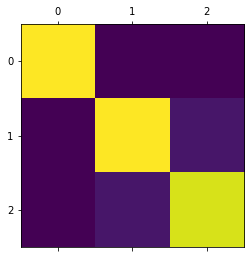

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
print('Confusion Matrix is')
print(confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.show()

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=df['target_class'].unique()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        18
           2       0.94      0.94      0.94        17

    accuracy                           0.96        52
   macro avg       0.96      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52



In [16]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


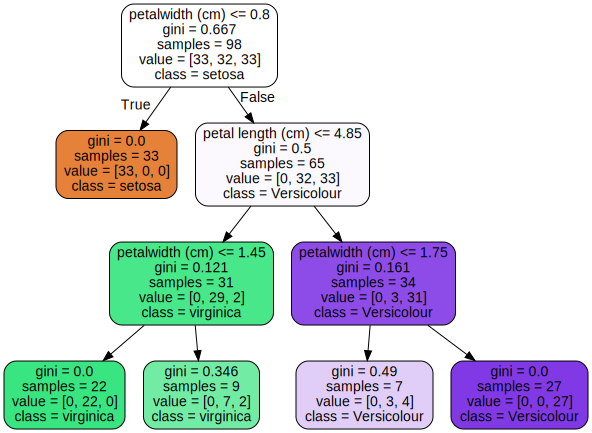

In [24]:
import os
os.environ["PATH"]+= os.pathsep + r'C:\Program Files\Graphviz\bin'

def plot_tree(tree, dataframe, label_col, label_encoder, plot_title):
    label_names = ['setosa','virginica','Versicolour']
    graph_data = export_graphviz(tree,
                          feature_names=dataframe.drop(label_col, axis=1).columns,
                           class_names=label_names,
                           filled=True,
                           rounded=True,
                           out_file=None)

    graph = graphviz.Source(graph_data)
    graph.render(plot_title)
    return graph 
tree_graph = plot_tree(tree, df, 'target_class', le, 'Iris')
tree_graph

In [14]:
# Assigning features and label variables

weather=['Rainy','Rainy','Overcast','Sunny','Sunny','Sunny',

     'Overcast','Rainy','Rainy','Sunny','Rainy','Overcast',

     'Overcast','Sunny']



temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool'

   'Mild','Cool','Mild','Mild','Mild','Hot','Mild']



play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes',

   'Yes','Yes','No']

In [15]:
import pandas as pd
data= {'weather': ['Rainy','Rainy','Overcast','Sunny','Sunny','Sunny',
                   'Overcast','Rainy','Rainy','Sunny','Rainy','Overcast',
                   'Overcast','Sunny'],
      'temp': ['Hot','Hot','Hot','Mild','Cool','Cool','Cool',
                'Mild','Cool','Mild','Mild','Mild','Hot','Mild'],
      'play': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']}

data= pd.DataFrame(data)
data

,weather,temp,play
0,Rainy,Hot,No
1,Rainy,Hot,No
2,Overcast,Hot,Yes
3,Sunny,Mild,Yes
4,Sunny,Cool,Yes
5,Sunny,Cool,No
6,Overcast,Cool,Yes
7,Rainy,Mild,No
8,Rainy,Cool,Yes
9,Sunny,Mild,Yes


In [18]:
wheather_encoded=le.fit_transform(data['weather'])
print (wheather_encoded)

[1 1 0 2 2 2 0 1 1 2 1 0 0 2]


In [19]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(data['temp'])
label=le.fit_transform(data['play'])
print ("Weather:",wheather_encoded)
print ("Temp:",temp_encoded)
print ("Play:",label)

Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [20]:
#Combinig weather and temp into single listof tuples
features=zip(wheather_encoded,temp_encoded)
features_ls= list(features)
print(features_ls)

[(1, 1), (1, 1), (0, 1), (2, 2), (2, 0), (2, 0), (0, 0), (1, 2), (1, 0), (2, 2), (1, 2), (0, 2), (0, 1), (2, 2)]


In [23]:
#Import Bernoulli Naive Bayes model
from sklearn.naive_bayes import GaussianNB, BernoulliNB

#Create a Bernoulli Classifier
model = BernoulliNB()

# Train the model using the training sets
model.fit(features_ls,label)

#Predict Output
predicted= model.predict([[1,0]]) # 0:Overcast, 2:Mild
print ("Predicted Value:", predicted)

Predicted Value: [1]


Exercise 2.3: Repeat the experiment again but now using Gaussian Naïve Bayes (just replace model= GaussianNB())! Is the result the same?


YES